## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [1]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [2]:

# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

In [3]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
                #callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])                )

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1338 - val_loss: 0.1452
Epoch 2/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1338 - val_loss: 0.1451
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1337 - val_loss: 0.1453
Epoch 4/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1338 - val_loss: 0.1451
Epoch 5/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1337 - val_loss: 0.1454
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1338 - val_loss: 0.1453
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1337 - val_loss: 0.1452
Epoch 8/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1337 - val_loss: 0.1454
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1337 - val_loss: 0.1451
Epoch 10/100
235/235 [==============================] - 3s 12ms/step - loss: 0.133

235/235 [==============================] - 3s 11ms/step - loss: 0.1324 - val_loss: 0.1459
Epoch 81/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1323 - val_loss: 0.1457
Epoch 82/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1324 - val_loss: 0.1457
Epoch 83/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1323 - val_loss: 0.1457
Epoch 84/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1322 - val_loss: 0.1458
Epoch 85/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1322 - val_loss: 0.1459
Epoch 86/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1323 - val_loss: 0.1459
Epoch 87/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1322 - val_loss: 0.1461
Epoch 88/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1323 - val_loss: 0.1458
Epoch 89/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1322 - 

In [10]:
#encoded_imgs
import matplotlib.pyplot as plt

encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs

313/313 [==============================] - 1s 2ms/step


array([[ 6.492888 ,  6.8563256, 22.064367 , 26.82297  ],
       [ 2.8883305,  2.5088582,  9.491822 ,  3.5451016],
       [19.026508 , 11.543101 , 44.91185  , 26.063074 ],
       ...,
       [16.173504 ,  4.925971 ,  8.4102125, 25.427483 ],
       [32.552547 ,  9.136099 , 23.281792 , 32.985123 ],
       [13.51031  ,  3.15626  ,  8.49117  ,  7.8894763]], dtype=float32)

In [11]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)

1/1 [==============================] - 0s 57ms/step


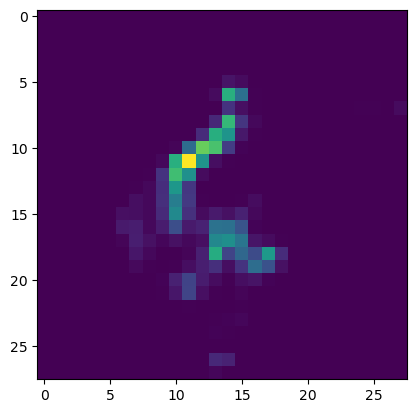

In [12]:
plt.imshow(noise_preds[1].reshape(28,28))

In [13]:
np.max(encoded_imgs)

66.15985

313/313 [==============================] - 1s 4ms/step


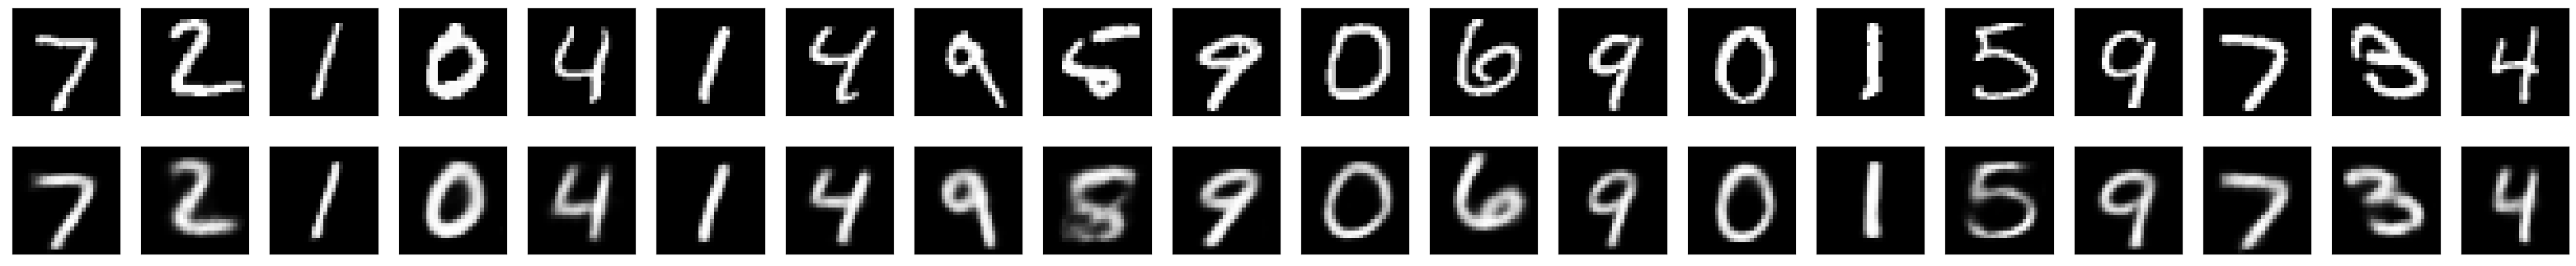

In [14]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
encoded_imgs

array([[ 6.492888 ,  6.8563256, 22.064367 , 26.82297  ],
       [ 2.8883305,  2.5088582,  9.491822 ,  3.5451016],
       [19.026508 , 11.543101 , 44.91185  , 26.063074 ],
       ...,
       [16.173504 ,  4.925971 ,  8.4102125, 25.427483 ],
       [32.552547 ,  9.136099 , 23.281792 , 32.985123 ],
       [13.51031  ,  3.15626  ,  8.49117  ,  7.8894763]], dtype=float32)

In [16]:
%matplotlib inline

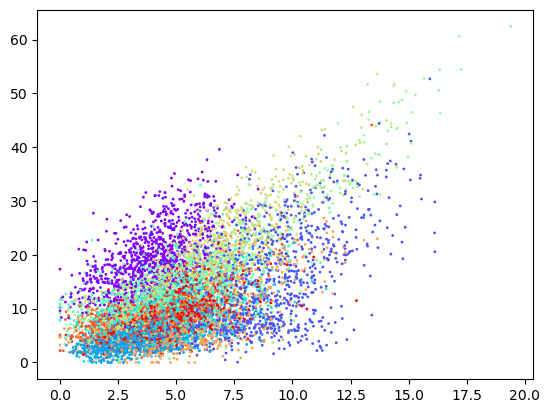

In [17]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()

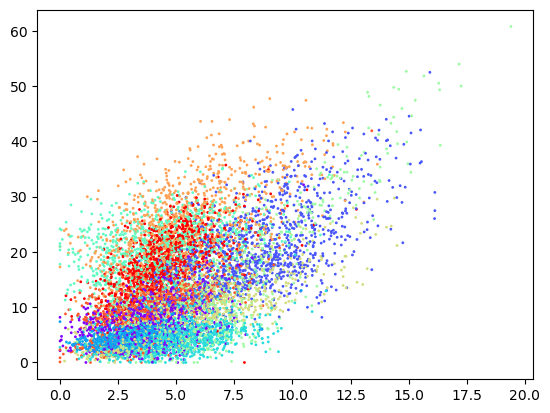

In [18]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()

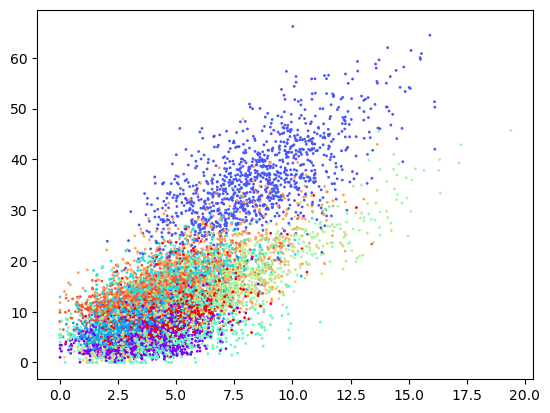

In [19]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()

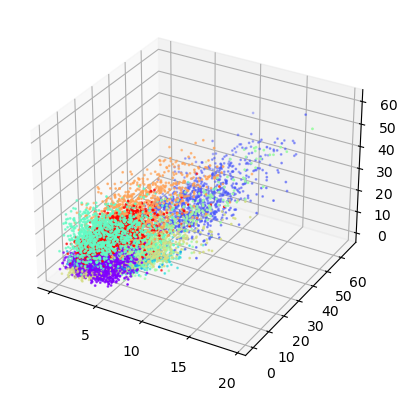

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and save the loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [31]:
from keras.models import Sequential
import tensorflow as tf

In [51]:
losses = []
dimensions = range(2,18,2)

model = Sequential()
encoding_dim = 2

for encoding_dim in dimensions:
    (xtrain, ytrain), (xtest, ytest) = mnist.load_data()

    xtrain = xtrain.astype('float32') / 255.
    xtest = xtest.astype('float32') / 255.
    xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
    xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
    
    # this is our input placeholder
    x = input_img = Input(shape=(784,))
    # "encoded" is the encoded representation of the input
    
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)

    encoded = Dense(encoding_dim, activation='relu')(x)


    # "decoded" is the lossy reconstruction of the input
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    # create a placeholder for an encoded input
    encoded_input = Input(shape=(encoding_dim,))
    # retrieve the last layer of the autoencoder model
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    # create the decoder model
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest))
    
    #bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    #loss = bce(ytrain, ytest).numpy()
    
    score = autoencoder.evaluate(xtest, xtest, verbose=0)
    #print('Test loss:', score[0])
    #print('Test accuracy:', score[1])
    #loss = score[0]
    
    losses.append(score)
    encoding_dim += 2
    

Epoch 1/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2672 - val_loss: 0.2274
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2172 - val_loss: 0.2080
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.2039 - val_loss: 0.1996
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1981 - val_loss: 0.1947
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1941 - val_loss: 0.1915
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1913 - val_loss: 0.1889
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1890 - val_loss: 0.1876
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1872 - val_loss: 0.1855
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1858 - val_loss: 0.1849
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1846

235/235 [==============================] - 3s 12ms/step - loss: 0.1661 - val_loss: 0.1726
Epoch 81/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1660 - val_loss: 0.1725
Epoch 82/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1660 - val_loss: 0.1723
Epoch 83/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1658 - val_loss: 0.1727
Epoch 84/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1657 - val_loss: 0.1725
Epoch 85/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1656 - val_loss: 0.1725
Epoch 86/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1655 - val_loss: 0.1721
Epoch 87/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1654 - val_loss: 0.1726
Epoch 88/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1654 - val_loss: 0.1723
Epoch 89/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1654 - 

Epoch 60/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1362 - val_loss: 0.1417
Epoch 61/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1361 - val_loss: 0.1418
Epoch 62/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1360 - val_loss: 0.1418
Epoch 63/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1359 - val_loss: 0.1418
Epoch 64/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1359 - val_loss: 0.1417
Epoch 65/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1357 - val_loss: 0.1419
Epoch 66/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1357 - val_loss: 0.1418
Epoch 67/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1356 - val_loss: 0.1414
Epoch 68/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1354 - val_loss: 0.1413
Epoch 69/100
235/235 [==============================] - 2s 10ms/step - loss

235/235 [==============================] - 2s 9ms/step - loss: 0.1224 - val_loss: 0.1246
Epoch 41/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1223 - val_loss: 0.1247
Epoch 42/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1221 - val_loss: 0.1244
Epoch 43/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1219 - val_loss: 0.1241
Epoch 44/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1218 - val_loss: 0.1242
Epoch 45/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1216 - val_loss: 0.1242
Epoch 46/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1215 - val_loss: 0.1243
Epoch 47/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1213 - val_loss: 0.1239
Epoch 48/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1212 - val_loss: 0.1242
Epoch 49/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1210 - val_loss: 

235/235 [==============================] - 2s 9ms/step - loss: 0.1251 - val_loss: 0.1247
Epoch 21/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1241 - val_loss: 0.1241
Epoch 22/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1233 - val_loss: 0.1236
Epoch 23/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1226 - val_loss: 0.1229
Epoch 24/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1221 - val_loss: 0.1224
Epoch 25/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1214 - val_loss: 0.1219
Epoch 26/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1210 - val_loss: 0.1216
Epoch 27/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1206 - val_loss: 0.1211
Epoch 28/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1201 - val_loss: 0.1208
Epoch 29/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1197 - val_loss

Epoch 100/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1106 - val_loss: 0.1152
Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.2280 - val_loss: 0.1598
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1495 - val_loss: 0.1418
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1399 - val_loss: 0.1360
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1353 - val_loss: 0.1324
Epoch 5/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1322 - val_loss: 0.1296
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1296 - val_loss: 0.1276
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1275 - val_loss: 0.1256
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1257 - val_loss: 0.1240
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1241 - va

Epoch 80/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1063 - val_loss: 0.1094
Epoch 81/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1061 - val_loss: 0.1094
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1062 - val_loss: 0.1096
Epoch 83/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1061 - val_loss: 0.1093
Epoch 84/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1060 - val_loss: 0.1093
Epoch 85/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1059 - val_loss: 0.1090
Epoch 86/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1059 - val_loss: 0.1095
Epoch 87/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1058 - val_loss: 0.1093
Epoch 88/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1058 - val_loss: 0.1096
Epoch 89/100
235/235 [==============================] - 2s 10ms/step - loss: 

Epoch 60/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1003 - val_loss: 0.1025
Epoch 61/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1003 - val_loss: 0.1024
Epoch 62/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1002 - val_loss: 0.1023
Epoch 63/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1001 - val_loss: 0.1024
Epoch 64/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1000 - val_loss: 0.1023
Epoch 65/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0999 - val_loss: 0.1023
Epoch 66/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0999 - val_loss: 0.1022
Epoch 67/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0998 - val_loss: 0.1024
Epoch 68/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0997 - val_loss: 0.1022
Epoch 69/100
235/235 [==============================] - 2s 10ms/step - lo

235/235 [==============================] - 3s 13ms/step - loss: 0.0947 - val_loss: 0.0960
Epoch 40/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0946 - val_loss: 0.0958
Epoch 41/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0944 - val_loss: 0.0958
Epoch 42/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0943 - val_loss: 0.0956
Epoch 43/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0942 - val_loss: 0.0955
Epoch 44/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0940 - val_loss: 0.0952
Epoch 45/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0938 - val_loss: 0.0952
Epoch 46/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0938 - val_loss: 0.0951
Epoch 47/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0936 - val_loss: 0.0952
Epoch 48/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0935 - 

235/235 [==============================] - 2s 10ms/step - loss: 0.1000 - val_loss: 0.0997
Epoch 19/100
235/235 [==============================] - 2s 11ms/step - loss: 0.0995 - val_loss: 0.0993
Epoch 20/100
235/235 [==============================] - 2s 11ms/step - loss: 0.0991 - val_loss: 0.0991
Epoch 21/100
235/235 [==============================] - 3s 13ms/step - loss: 0.0988 - val_loss: 0.0990
Epoch 22/100
235/235 [==============================] - 4s 15ms/step - loss: 0.0984 - val_loss: 0.0982
Epoch 23/100
235/235 [==============================] - 6s 25ms/step - loss: 0.0980 - val_loss: 0.0982
Epoch 24/100
235/235 [==============================] - 5s 22ms/step - loss: 0.0977 - val_loss: 0.0978
Epoch 25/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0975 - val_loss: 0.0975
Epoch 26/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0971 - val_loss: 0.0974
Epoch 27/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0969 - 

235/235 [==============================] - 3s 11ms/step - loss: 0.0903 - val_loss: 0.0928
Epoch 98/100
235/235 [==============================] - 3s 12ms/step - loss: 0.0902 - val_loss: 0.0924
Epoch 99/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0902 - val_loss: 0.0924
Epoch 100/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0902 - val_loss: 0.0924


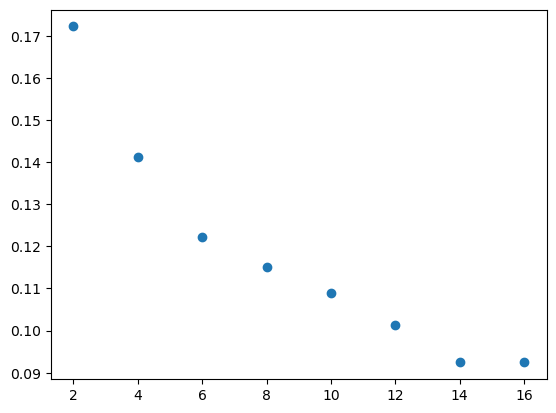

In [52]:
# plot scores
plt.scatter(dimensions, losses)



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [67]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))

# this is the size of our encoded representations
encoding_dim = 8  

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)

noise_factor = 0.5
x_train_noisy = xtrain + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=xtrain.shape) 
x_test_noisy = xtest + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=xtest.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



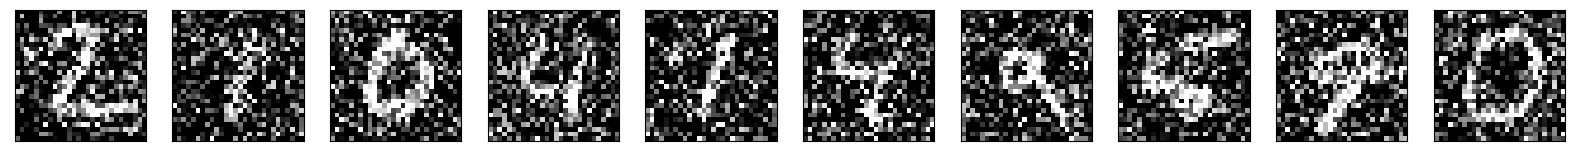

In [68]:
# show noisy digits
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [70]:

# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



autoencoder.fit(x_train_noisy, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, xtest))

Epoch 1/100
235/235 [==============================] - 3s 10ms/step - loss: 0.2098 - val_loss: 0.1589
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1541 - val_loss: 0.1489
Epoch 3/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1474 - val_loss: 0.1451
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1436 - val_loss: 0.1429
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1408 - val_loss: 0.1408
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1386 - val_loss: 0.1394
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1368 - val_loss: 0.1382
Epoch 8/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1352 - val_loss: 0.1373
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1339 - val_loss: 0.1368
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1327 - val_

235/235 [==============================] - 2s 9ms/step - loss: 0.1143 - val_loss: 0.1392
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1143 - val_loss: 0.1396
Epoch 83/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1141 - val_loss: 0.1399
Epoch 84/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1140 - val_loss: 0.1396
Epoch 85/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1140 - val_loss: 0.1403
Epoch 86/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1139 - val_loss: 0.1397
Epoch 87/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1138 - val_loss: 0.1400
Epoch 88/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1138 - val_loss: 0.1400
Epoch 89/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1137 - val_loss: 0.1402
Epoch 90/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1136 - va

In [73]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs

313/313 [==============================] - 0s 1ms/step


array([[17.86445   , 15.076974  , 20.210691  , ..., 28.51276   ,
        19.409489  , 15.571118  ],
       [12.6109085 ,  4.7654057 , 18.365309  , ..., 12.087438  ,
         1.6000012 ,  8.5857315 ],
       [ 9.384528  ,  3.237296  , 18.123953  , ..., 23.711569  ,
         8.362067  , 10.747258  ],
       ...,
       [ 5.2822046 ,  3.746246  , 12.853698  , ..., 22.848042  ,
        19.787802  ,  7.962569  ],
       [18.424696  ,  6.5821466 ,  3.4318142 , ..., 13.84178   ,
        14.518277  ,  0.42658108],
       [ 7.6378555 ,  3.641212  ,  9.946844  , ...,  2.4004438 ,
        19.35532   ,  8.209737  ]], dtype=float32)

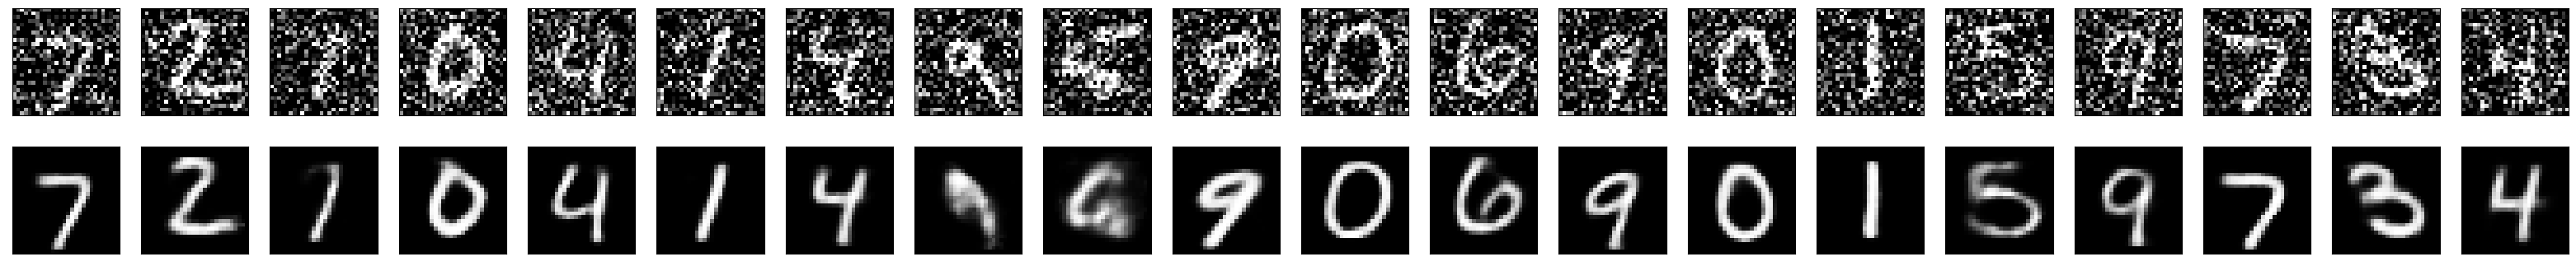

In [75]:
n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()